In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 导入数据

In [2]:
# 导入数据
wine = load_wine()

In [3]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.data.shape

(178, 13)

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### 模型评估

In [7]:
# 构建学习
rdf = RandomForestClassifier(random_state=10, n_estimators=10)
clf = DecisionTreeClassifier(random_state=10)

In [8]:
# 划分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size = 0.3)

In [9]:
# 训练并且评估
rdf.fit(Xtrain, Ytrain)
clf.fit(Xtrain, Ytrain)
print("clf socre:",clf.score(Xtest, Ytest))
print("Rfc score:",rdf.score(Xtest, Ytest))

clf socre: 0.8703703703703703
Rfc score: 0.9444444444444444


###  交叉验证 

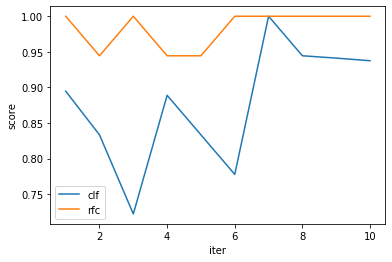

In [17]:
# 版本一
# 交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集
# ，多次训练模型以观测模型稳定性的方法
rfc = RandomForestClassifier(n_estimators=32, random_state=10)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier(random_state=10)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), clf_s, label = "clf")
plt.plot(range(1, 11), rfc_s, label = "rfc")
plt.xlabel("iter")
plt.ylabel('score')
plt.savefig("./imgs/Random and Deacision tree.png")
plt.legend()
plt.show()

Decision: 0.8773413312693499
Randomforest: 0.9833333333333334


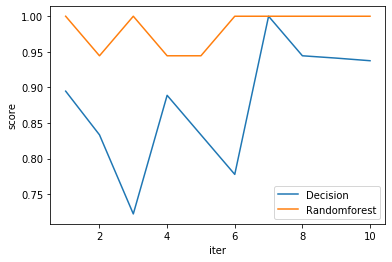

In [15]:
# 版本二
label = "Decision"
for model in [DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=32, random_state=10)]:
    score = cross_val_score(model, wine.data, wine.target, cv = 10)
    print("{}:".format(label), score.mean())
    plt.plot(range(1, 11), score, label = label)
    label = "Randomforest"
plt.xlabel("iter")
plt.ylabel('score')
plt.legend()
plt.show()

####  十次交叉验证

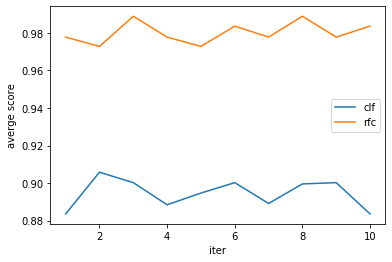

In [21]:
clf_m = []
rfc_m = []

for i in range(10):
    clf = DecisionTreeClassifier()
    clf_m.append(cross_val_score(clf, wine.data, wine.target, cv=10).mean())
    
    rfc = RandomForestClassifier(n_estimators=32)
    rfc_m.append(cross_val_score(rfc, wine.data, wine.target, cv = 10).mean())
    
plt.plot(range(1, 11), clf_m, label = "clf")
plt.plot(range(1, 11), rfc_m, label = "rfc")
plt.xlabel("iter")
plt.ylabel('averge score')
plt.savefig("./imgs/10cross valid.png")
plt.legend()
plt.show()

#### 随机森林的大小预测情况

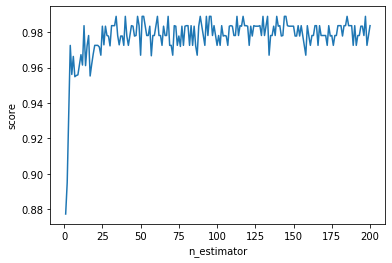

In [128]:
# 预定200个决策树
n_score = []

for i in range(200):
    rcf = RandomForestClassifier(n_estimators=i+1)
    score = cross_val_score(rcf, wine.data, wine.target, cv=10)
    n_score.append(score.mean())
plt.plot(range(1, 201), n_score)
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.show()

In [129]:
print("最佳分类评分:{}\n最好的分类器个数:{}".format(max(n_score)
                                      , n_score.index(max(n_score))+1))

最佳分类评分:0.9888888888888889
最好的分类器个数:34


#### 随机森林的错误率


In [22]:
import numpy as np
from scipy.special import comb

# 只有一般以上的错误，随机森林的判别结果才会出现错误
np.array([comb(25, i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13, 26)]).sum()

0.00036904803455582827

In [23]:
# 随机森林中randon state的用法
rfc = RandomForestClassifier(n_estimators=25
                             ,random_state=2
                            )
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest, Ytest)

0.9814814814814815

In [24]:
# 获得特定基分类器的具体参数, estimators_查看树的参数
rfc.estimators_[0].random_state

1872583848

In [25]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


随机森林采用自助求取数据，这使得最终的会有一部分数据未被分到
即落在包外的数据，称为out of bag(oob), 随意随机森林可以不用设置测试机和训练集
直接在使用包外数据进行测试。但是此时的数据集必须较大才可以有效果
，否则较小的选择数据会样本被完全选择

In [12]:
# 使用oob进行测试
rfc = RandomForestClassifier(n_estimators=25
                             ,oob_score=True # 使用袋外数据（前提：当n很大的时候）
                             ,random_state=10
                            )
rfc.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

In [16]:
# 使用包外数据进行测试
rfc.oob_score_

0.9596774193548387

In [28]:
list(zip(wine.feature_names, rfc.feature_importances_))

[('alcohol', 0.09802665274472994),
 ('malic_acid', 0.04200312833451871),
 ('ash', 0.014254672601322696),
 ('alcalinity_of_ash', 0.0495284900473679),
 ('magnesium', 0.05867899799846975),
 ('total_phenols', 0.05699679368370348),
 ('flavanoids', 0.14030836073645717),
 ('nonflavanoid_phenols', 0.01578239049730595),
 ('proanthocyanins', 0.02276593571357596),
 ('color_intensity', 0.15956704324809393),
 ('hue', 0.06022386280520429),
 ('od280/od315_of_diluted_wines', 0.12352195871177721),
 ('proline', 0.1583417128774731)]

In [247]:
# 每一个样本所属各个类别的概率
rfc.predict_proba(Xtest)

array([[0.88, 0.08, 0.04],
       [0.12, 0.8 , 0.08],
       [0.68, 0.28, 0.04],
       [0.  , 1.  , 0.  ],
       [0.04, 0.04, 0.92],
       [0.04, 0.12, 0.84],
       [0.  , 1.  , 0.  ],
       [0.  , 0.24, 0.76],
       [0.  , 0.  , 1.  ],
       [0.2 , 0.64, 0.16],
       [1.  , 0.  , 0.  ],
       [0.12, 0.76, 0.12],
       [0.16, 0.72, 0.12],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.08, 0.16, 0.76],
       [0.08, 0.12, 0.8 ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.  , 0.04],
       [0.96, 0.  , 0.04],
       [1.  , 0.  , 0.  ],
       [0.12, 0.2 , 0.68],
       [0.04, 0.88, 0.08],
       [1.  , 0.  , 0.  ],
       [0.08, 0.4 , 0.52],
       [0.  , 0.12, 0.88],
       [0.  , 0.72, 0.28],
       [0.  , 0.04, 0.96],
       [0.04, 0.96, 0.  ],
       [0.76, 0.24, 0.  ],
       [0.04, 0.  , 0.96],
       [1.  , 0.  , 0.  ],
       [0.68, 0.32, 0.  ],
       [0.  , 0.96, 0.04],
       [0.04, 0.04, 0.92],
       [0.96, 0.04, 0.  ],
       [0.  , 0.08, 0.92],
 

In [244]:
# 行：样本　列：基本分类器　每一棵子树预测的结果
rfc.apply(Xtest).shape

(54, 25)

In [245]:
Xtest.shape

(54, 13)

In [31]:
# 显示每一个样本在每一课树上的最终叶子节点
rfc.apply(Xtest)

array([[20, 12, 14, ..., 16, 17, 16],
       [20, 12, 14, ..., 16, 17, 22],
       [ 7,  1,  2, ...,  4,  8,  7],
       ...,
       [ 3,  8,  7, ...,  9, 12, 19],
       [ 3,  8,  7, ...,  3,  6, 19],
       [14,  1,  2, ..., 16,  8, 16]])

In [32]:
# 预测每一个样本可能的分类
rfc.predict(Xtest)

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2,
       1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 1, 1, 0, 0, 0, 1, 2, 2, 1])

### 弱分类器要比随机猜测好一点（百分之五十的概率）

In [33]:
import numpy as pd

In [34]:
# 查看误差
x = np.linspace(0, 1, 20)
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

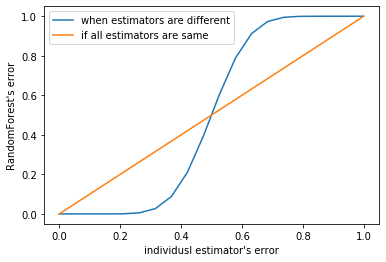

In [35]:
# 一棵树决策树的误差率）
y = []
for epsion in np.linspace(0, 1, 20):
    E = np.array([comb(25, i)*(epsion**i)*((1-epsion)**(25-i))
                  for i in range(13, 26)]).sum()
    y.append(E)

plt.plot(x, y, label="when estimators are different")
plt.plot(x, x, label="if all estimators are same")

plt.xlabel("individusl estimator's error")
plt.ylabel("RandomForest's error")
plt.savefig("./imgs/基分类器要好.png")
plt.legend()
plt.show()